# Ted Talk Popularity Technical Report: What Ideas are worth spreading? 

*By: Amanda Showler*

***

## Introduction <a id='Introduction'></a>
I chose to explore the world of TED talks for my project as I am curious about what causes some talks to go viral and why others have much smaller audiences. Undeniably, the popularity of one TED talk compared to another is not consistent, a dataset containing information from 2550 TED Talks found that views on the talks ranged from 50,443 to 47,227,110 views as of September 21st, 2017. This begs the question, what factors make a TED Talk popular? How can a popular TED Talk be defined? What factors do popular TED Talks have in common? For example, does the day of the week that the talk was published affect viewership?

***
## Table of Contents <a id='Table'></a>
1. [Introduction](#Introduction)
2. [Table of Contents](#Table)
3. [Description of the data](#Description)
4. [Analysis of the data](#Analysis)<br>
    4.1. [Data Quality Summary](#Data)<br>
    4.2. [Features of the Merged Dataset](#Features)<br>
    4.3. [Data Cleaning](#Clean)<br>
5. [Exploratory Data Analysis](#Exploratory)<br>
    5.1. [Section 1: Add Calculated Columns](#Add)<br>
    5.2. [Section 2: Define Popularity using 'The Most Popular Talks of All Time' Playlist](#Define) <br>
    5.3. [Section 3: Evaluate the Definition of Popularity through Visualizations](#Comparison)<br>
    5.4. [Section 4: Final Thoughts on Defining Popularity with the Playlist](#Thoughts)<br>
    5.5. [Section 5: Define Popularity using Ratings and Views](#Rating)<br>
    5.6. [Section 6: Evaluate Definition of Popularity Using Ratings through Visualizations](#Eval)<br>
    5.7. [Section 7: Final Thoughts on Defining Popularity with Views and Ratings](#Final)<br>
    5.8. [Section 8: Explore TED Talk Popularity](#Fav)
6. [Potential Data Science](#Potential)
7. [Conclusion](#Conclusion)
8. [References](#References)
***

[BACK TO TABLE OF CONTENTS](#Table)
## Description of the data <a id='Description'></a>
The datasets are called 'ted_main' and 'transcripts' and they are available at https://www.kaggle.com/rounakbanik/ted-talks. The data was extracted from TED.com by Rounak Banik under the Creative Commons License and I accessed it through my account on Kaggle.com. The ted_main dataset has 2550 rows which have data from each TED talk and 17 columns for data attributes which are described in [Features of the Dataset](#Features). The other dataset, transcript, has two columns which include the TED talk's English transcript and URL. 

***

[BACK TO TABLE OF CONTENTS](#Table)
## Analysis of the data <a id='Analysis'></a>
NOTE: Code for analysis is below the markdown cell

#### Data Quality Summary: <a id='Data'></a>
The quality of the data is high as most of the data is useable for the analysis. I originally started with 2550 rows and after preliminary data cleaning and merging two of the datasets, I have 2380 rows without any null values. I removed the rows that were missing speaker_occupation data and transcripts. In addition, I converted the film date and published date to datetime successfully so the columns had the correct format. I dropped rows from the dataset if the talk was not given at a TED event. To double-check the accuracy of the merge between the two datasets, I used iloc to check 10 rows throughout the dataset in comparison to the information available on the TED Talk website. After I merged the two datasets, there are 18 columns (including transcript) and 2380 rows of TED Talk data. 

#### Features of the Merged Dataset: <a id='Features'></a>
| Feature # | Name | Description |
|:----------|:----------------|:------------|
|1 | *comments* | The total number of top-level comments on talk (i.e. It is a reply to the TED talk, it is not a reply to another comment).|
|2 | *description* | A summary of the ideas presented in the TED talk.|
|3 | *duration* | The length of the TED talk in seconds.|
|4 | *event* | Name of the TED event where the talk occurred.|
|5 | *film-date* | The date and time of the talk formatted as a UNIX timestamp.|
|6 | *languages* | The total number of languages in which the TED talk is available for viewing.|
|7 | *main_speaker* | The name of the first speaker.|
|8 | *name* | The name of the TED talk which also includes the speaker's name.|
|9 |*num_speaker* | The number of speakers in the TED talk.|
|10 | *published date* | The date the TED Talk was published on TED.com formatted as a UNIX timestamp.|
|11 | *ratings* | A dictionary of the ratings from the TED Talk.|
|12 | *related_talks* | A dictionary of the recommended talks to watch after the current talk.|
|13 | *speaker_occupation* | The job(s) of the main speaker.|
|14 | *tags* | The themes/main ideas associated with the TED Talk.|
|15 | *title* | The name of the TED Talk which does not include the speaker's name.|
|16 | *url* | The URL of the talk on TED.com.|
|17 | *views* | The number of views on the talk as of September 22nd, 2017.|
|18 | *transcript* | The transcript of the talk in English.| 

#### Data Cleaning: <a id='Clean'></a>
1. *Datetime Conversion* - The date the talk was filmed and published is important in the analysis to answer questions about whether posting on a certain day, the year it was published and/or other factors about date can affect viewership and popularity. For this reason, I chose to convert the UNIX timestamp to datetime below so the date was easier to read and use during the analysis.
2. *Drop null values* - I noted there were 6 speaker_occupation missing so I removed those rows from the df_main dataset.
3. *Drop non-TED events* - TED posts videos that are not from a TED event. I removed those rows from the df_main dataset so the exploration data analysis is on solely TED talks. 
4. *Merge of two datasets* - The transcript and main dataset both included the URL column so I merged the two datasets by URL.

In [249]:
# Import dataset and libraries

# import in pandas library
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np
from scipy import stats
# import the 2 datasets
df_main = pd.read_csv('ted_main.csv') 
df_transcript = pd.read_csv('transcripts.csv')

In [250]:
# Find the number of rows and columns. Are there any missing values?

print('---------------------------------------------ted_main.csv---------------------------------------------')

# Information about ted_main dataset 
# 17 columns with no null values except for column 12 speaker_occupation which has 6 null values.
# 7 columns have int64 datatypes and the other 10 columns have object datatypes.

df_main.info()

print('--------------------------------------------transcript.csv--------------------------------------------')

# Information about transcript dataset
# 2 columns with 2467 data entries in both the transcript and url columns.
# 2 columns have object datatypes

df_transcript.info()


---------------------------------------------ted_main.csv---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title            

In [251]:
# Perform data cleaning on df_main by removing the 6 rows with missing speaker's occupation.

df_main = df_main.dropna()
df_main.shape # check shape to ensure there are 2544 rows instead of 2550 after dropping null values

(2544, 17)

In [252]:
# Remove non-TED events

# The unique event values show that some of the talks included in the dataset are not from a TED event
#print(df['event'].unique())

# Example: Business Innovation Factory has two talks in row 729 and 754. Using the url, I found it is
# a TED "Best of the Web" pick.
#df.loc[(df['event'] == 'Business Innovation Factory')]

# Function to check if an event string includes 'TED'
def check_TED(name_event):
    TED = 'TED'
    if TED in name_event:
        return name_event
    return np.nan # if it is not a TED event, return a null value

# Remove rows where the event name doesn't include TED 
df_main['event'] = df_main['event'].apply(check_TED)

# Drop NaN values
df_main = df_main.dropna()

# Check if the rows were dropped that weren't TED events
df_main.shape

(2433, 17)

In [253]:
# Merge the transcript.csv file with the main dataset

# Check if there are any unique urls in transcript that were removed from main
main_url = len(df_main['url'].unique())
transcript_url = len(df_transcript['url'].unique())
print('There are ' + str(main_url) + ' urls in df_main')
print('There are ' + str(transcript_url) + ' urls in df_transcript')

# Merge the two original datasets by url
df = pd.merge(df_main, df_transcript, on='url')
# Check to ensure number of rows is the same for each column
df.info() # Each column has 2380 rows

There are 2433 urls in df_main
There are 2464 urls in df_transcript
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2380 non-null   int64 
 1   description         2380 non-null   object
 2   duration            2380 non-null   int64 
 3   event               2380 non-null   object
 4   film_date           2380 non-null   int64 
 5   languages           2380 non-null   int64 
 6   main_speaker        2380 non-null   object
 7   name                2380 non-null   object
 8   num_speaker         2380 non-null   int64 
 9   published_date      2380 non-null   int64 
 10  ratings             2380 non-null   object
 11  related_talks       2380 non-null   object
 12  speaker_occupation  2380 non-null   object
 13  tags                2380 non-null   object
 14  title               2380 non-null   object
 15  url 

In [254]:
# Convert the film_date and publishing date to datetime instead of UNIX
df['film_date'] = pd.to_datetime(df['film_date'], unit='s')
df['published_date'] = pd.to_datetime(df['published_date'], unit='s')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


***
[BACK TO TABLE OF CONTENTS](#Table)
## Exploratory Data Analysis <a id='Exploratory'></a>

***
### Section 1: Add Calculated Columns <a id='Add'></a>
**NOTE:** RUN ONCE ONLY

In [256]:
# Add additional columns to the dataset 

# Ratio between comments/view columns
df['com_per_view'] = df['comments'] / df['views'] * 100 # Multiply by 100 for percent

# Film_year, film_month and film_day columns
df['film_year'] = df['film_date'].dt.year # 1984-2017
df['film_month'] = df['film_date'].apply(lambda x: x.month) # 1 (January) - 12 (December)
df['film_weekday'] = df['film_date'].apply(lambda x: x.weekday()) # 0 (Monday) - 6 (Sunday)

# Pub_year, pub_month and pub_day columns (When it was published)
df['pub_year'] = df['published_date'].dt.year # 2006-2017
df['pub_month'] = df['published_date'].apply(lambda x: x.month) # 1 (January) - 12 (December)
df['pub_weekday'] = df['published_date'].apply(lambda x: x.weekday()) # 0 (Monday) - 6 (Sunday)

***
[BACK TO TABLE OF CONTENTS](#Table)
### Section 2: Define Popularity using 'The Most Popular Talks of All Time' Playlist <a id='Define'></a>
1. **Create a dataset with rows from the most popular talks of all time TED Talk playlist:** 
    - According to TED, the most popular talks are within the 'popular' dateset [[2]](https://www.ted.com/playlists/171/the_most_popular_talks_of_all)
    - I created a dataset of the talks from the playlist so I could calculate statisical values, namely, mean and minimum values.
    <br>
    <br>
2. **Define popularity:**
    - **Defintion:** *The number of views on the talk is greater than or equal to the minimum number of views from the popular dataset and the number of comments on talk is greater than or equal to the minimum number of comments from the popular dataset.*
    - **Results:** Using the definition, 310 rows or about 13% of the dataset is defined as popular which I believe is reasonable.
    - **Reasoning:** 
        - The views and comments on a talk represent how many people have watched and engaged with a video in the top-level comments. 
        - The original top 25 most popular talks playlist was developed by TED. and I wanted to use it to develop the number of views and comments needed on a talk to define it as popular. 
        - I removed outliers greater than 3 IQR from the Q1 or Q3. After, the dataframe still had 25 rows so there were no outliers in the dataset
        - I chose to us the minimum value from both the views and comments columns as the cut-off for my measure of popularity because it showed the lowest number of views and comments needed for TED to define the talk as popular. 
        - I also considered using the mean value from the popular dataset but it would have only included 5 rows or about 0.2% of the dataset so I ruled this method out.

In [257]:
# 1. Create a dataset with rows from most popular talks of all time TED Talk playlist [2]
titles = ['Do schools kill creativity?', 'Your body language may shape who you are', 'How great leaders inspire action',
         'The power of vulnerability', 'Inside the mind of a master procrastinator', 'How to speak so that people want to listen',
         "The next outbreak? We’re not ready", "Looks aren't everything. Believe me, I'm a model.",
          'What makes a good life? Lessons from the longest study on happiness', "10 things you didn't know about orgasm",
         'How to spot a liar', 'The art of misdirection', 'How I held my breath for 17 minutes', 'The power of introverts',
         'My stroke of insight', 'The puzzle of motivation', 'Strange answers to the psychopath test', 
          'How to make stress your friend', 'The danger of a single story', 'The happy secret to better work',
         '10 ways to have a better conversation', 'Grit: The power of passion and perseverance', 'Your elusive creative genius',
         'The surprising science of happiness', 'The thrilling potential of SixthSense technology']

# I used titles because some speakers have multiple TED Talks
def playlist_check(x):
    for i in range(len(titles)):
        if (titles[i] == x):
            return 1
    return 0

# 0 - The talk is not in the top 25 most popular
# 1 - The talk is in the top 25 most popular
df['popular'] = df['title'].apply(playlist_check)

# dataframe of the 25 most popular TED Talks playlist
popular = df.loc[df['popular'] == 1]

# Remove extreme outliers
z_value = np.abs(stats.zscore(popular['views']))
non_outlier = (z_value < 3)
popular = popular[non_outlier] # 25 rows still, no extreme outliers in data
popular

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,views,transcript,com_per_view,film_year,film_month,film_weekday,pub_year,pub_month,pub_weekday,popular
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,47227110,Good morning. How are you?(Laughter)It's been ...,0.009641,2006,2,5,2006,6,1,1
29,970,"Dan Gilbert, author of ""Stumbling on Happiness...",1276,TED2004,2004-02-02,43,Dan Gilbert,Dan Gilbert: The surprising science of happiness,1,2006-09-26 00:11:00,...,14689301,"When you have 21 minutes to speak, two million...",0.006603,2004,2,0,2006,9,1,1
197,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,2008-02-27,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,2008-03-12 01:10:00,...,21190883,I grew up to study the brain because I have a ...,0.013577,2008,2,2,2008,3,2,1
344,1604,Elizabeth Gilbert muses on the impossible thin...,1149,TED2009,2009-02-05,49,Elizabeth Gilbert,Elizabeth Gilbert: Your elusive creative genius,1,2009-02-09 01:00:00,...,13155478,I am a writer. Writing books is my profession ...,0.012193,2009,2,3,2009,2,0,1
405,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,2009-02-06,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,2009-05-20 01:00:00,...,22270883,Alright. I'm going to show you a couple of ima...,0.001590,2009,2,4,2009,5,2,1
451,1094,Career analyst Dan Pink examines the puzzle of...,1116,TEDGlobal 2009,2009-07-24,44,Dan Pink,Dan Pink: The puzzle of motivation,1,2009-08-24 01:00:00,...,18830983,I need to make a confession at the outset here...,0.005810,2009,7,4,2009,8,0,1
480,1155,"Our lives, our cultures, are composed of many ...",1129,TEDGlobal 2009,2009-07-23,46,Chimamanda Ngozi Adichie,Chimamanda Ngozi Adichie: The danger of a sing...,1,2009-10-07 01:00:00,...,13298341,I'm a storyteller. And I would like to tell yo...,0.008685,2009,7,3,2009,10,2,1
502,1329,"At TEDIndia, Pranav Mistry demos several tools...",830,TEDIndia 2009,2009-11-05,42,Pranav Mistry,Pranav Mistry: The thrilling potential of Sixt...,1,2009-11-16 01:00:00,...,16097077,We grew up interacting with the physical objec...,0.008256,2009,11,3,2009,11,0,1
537,296,"In this highly personal talk from TEDMED, magi...",1219,TEDMED 2009,2009-10-27,34,David Blaine,David Blaine: How I held my breath for 17 minutes,1,2010-01-19 08:22:00,...,15601385,"As a magician, I try to create images that mak...",0.001897,2009,10,1,2010,1,1,1
604,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,2009-09-17,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,2010-05-04 09:31:00,...,34309432,How do you explain when things don't go as we ...,0.005625,2009,9,3,2010,5,1,1


In [258]:
# 2. Define popularity by a talk having both the minimum number of views and the minimum number of comments 
#    in the popular dataset

define_views = popular['views'].min()
define_comm = popular['comments'].min()
print("Necessary Minimum Views for Popular Talk: " + str(define_views))
print("Necessary Minimum Comments for Popular Talk: " + str(define_comm))

# Change the popular column to reflect my chosen definition of popularity
def popular_check(x):
    if ((x['comments'] >= define_comm) & (x['views'] >= define_views)):
        return 1 # 1 - the talk is popular
    return 0 # 0 - the talk is not popular

df['popular'] = df.apply(lambda y: popular_check(y), axis=1)
df_pop = df.loc[df['popular'] == 1]
df_pop.shape

Necessary Minimum Views for Popular Talk: 2239259
Necessary Minimum Comments for Popular Talk: 171


(310, 26)

***
[BACK TO TABLE OF CONTENTS](#Table)
### Section 3: Evaluate the Definition of Popularity through Visualizations <a id='Comparison'></a>

1. **Count of TED Talks per Year:**
|  | Number of TED Talks per Year | <p style="color:red"> Number of Popular TED Talks per Year |
|:-|:---------------|:------------------|
|**Process**| - During my first attempt, I used the published_date column to count the number of TED Talks through the years. The data of the years for all talks ranged from 2006-2017. The first TED Talk was given in 1984 so the approach was unsuccessful [[1]](https://www.ted.com/about/our-organization/history-of-ted). <br> - I solved the problem by extracting year from the film_date column instead. This approach outputted reasonable year values ranging from 1984 to 2017. | - I used the same process to format a visualization for popular TED Talks. <br> - A challenge I had was formatting subplots as it outputted blank graphs. I fixed the issue by assigning ax within the parameters of the plot. <br> - I formatted the two bar charts to share a y axis so the number of talks was easier to compare. |
| **Results** | - Overall, the number of TED Talks increases over the years. <br> - The number of TED Talks in 2009 was more than triple the number from 2008. <br> - The number of talks in 2017 is less than half the number from 2016. I think a contributing factor for the decrease is that the dataset is only accurate up until September 21st 2017. | - The number of popular TED talks peaked around 2012-2013. <br> - The film year of popular talks range from 2001 to 2007. <br> - The number of popular talks has decreased each year after 2013. The length of time the talk has been published for certainly impacts viewership and engagement in the comments.|

*Code and Visualization Below*

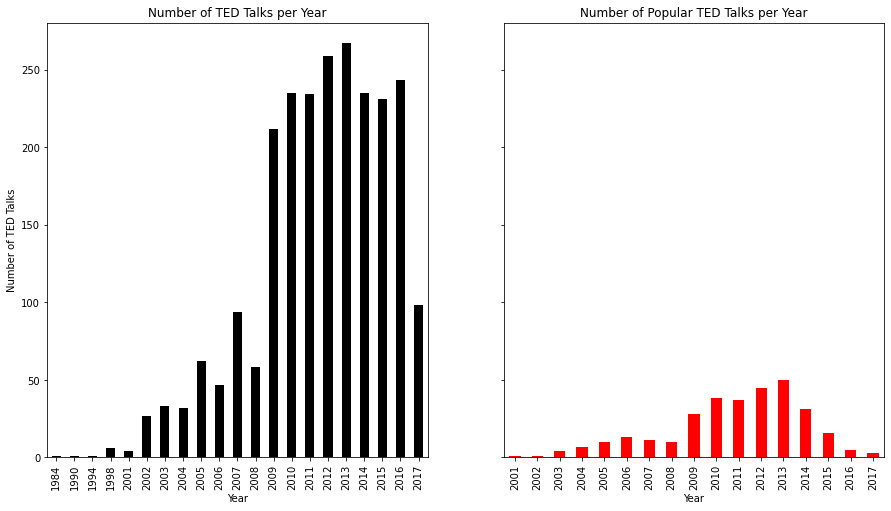

In [244]:
# 1. How many TED Talks were given at a TED event each year? How many were popular?

# Count of the number of TED Talks per year
year_pub = df['film_year'].value_counts().sort_index()
pop_pub = df_pop['film_year'].value_counts().sort_index()

# Display visualization of subplots
fig, axis = plt.subplots(1, 2, sharey=True,figsize=(15,8))
ax1 = year_pub.plot(kind='bar',ax=axis[0],color='k')
ax1.set_title("Number of TED Talks per Year")
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of TED Talks')
ax2 = pop_pub.plot(kind='bar',ax=axis[1],color='r')
ax2.set_title("Number of Popular TED Talks per Year");
ax2.set_xlabel('Year');


2. **Views per TED Event:**
|  | Number of TED Talks per Year | <p style="color:red"> Number of Popular TED Talks per Year |
|:-|:--------------|:------------------|
|**Process**| - I tried grouping by year and calculating the sum of views. The visualization was unsuccessful in providing more insights because views by year had a very similar distribution to the number of TED talks given each year. <br> - I noticed the event column was more specific than year to gather an understanding of popular events. I decided to group by the event column instead of year. <br> - There were 303 unique events within the groupby so I chose to sort and slice it to only include the 15 events with the most views. | - A similar process was used for popular TED talks. <br> - I noticed the scale was hard to read in log form so I used a map function to divide the values into millions of views instead of ones. |
|**Results**| - The total number of views per event for the top 15 events ranged by about 70 million views. <br> - The event with most views was the TED 2013 event with 177 million views.  | - A popular talk was given at 87/303 TED events <br> - The TED event with the most views on popular TED talks is TED2006 with around 120 million views. |
*Code and Visualization Below*

Number of TED events: 303
Number of events with popular TED talk: 87


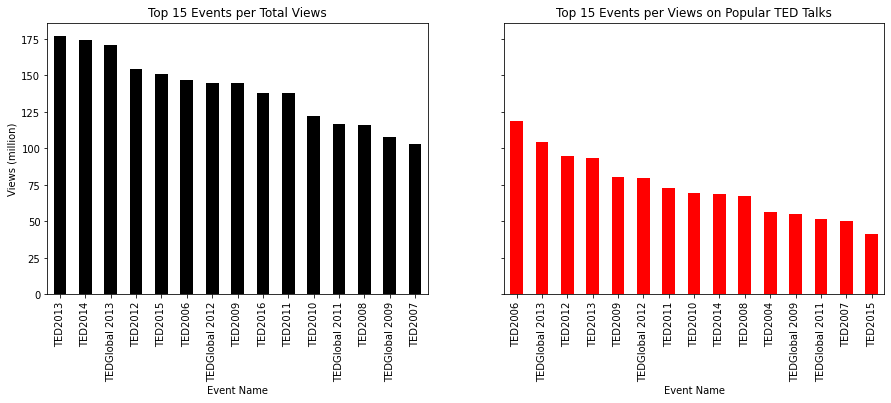

In [245]:
# 2. How many views per TED event?

# Sum views on TED Talks per year
views_year = df.groupby('event').sum()['views'].sort_values(ascending=False)[:15]
views_pop = df_pop.groupby('event').sum()['views'].sort_values(ascending=False)[:15]

# Divide sum of views by a million so scale is easier to read
views_year = views_year.map(lambda x: x/1000000)
views_pop = views_pop.map(lambda x: x/1000000)

# Print number of unique events
print("Number of TED events: "+ str(df['event'].nunique()))
print("Number of events with popular TED talk: "+ str(df_pop['event'].nunique()))

# Display visualization of subplots
fig, axis = plt.subplots(1, 2, sharey=True,figsize=(15,5))
ax1 = views_year.plot(kind='bar',ax=axis[0],color='k')
ax1.set_title("Top 15 Events per Total Views")
ax1.set_xlabel('Event Name')
ax1.set_ylabel('Views (million)')
ax2 = views_pop.plot(kind='bar',ax=axis[1],color='r')
#plt.ylim(40000000,200000000)
ax2.set_title("Top 15 Events per Views on Popular TED Talks");
ax2.set_xlabel('Event Name');

3. **Correlation between Numerical Attributes**
|  | Number of TED Talks per Year | <p style="color:red"> Number of Popular TED Talks per Year |
|:-|:--------------|:------------------|
|**Process**| - I created a heatmap to uncover moderate correlation between any of the data attributes. <br> - I changed the colour palette of the heatmap to be from red to green instead of the default colour palette. | - I used the same colour pallette and used titles to distingush between popular and unpopular |
|**Results**| - I found there was a moderate correlation between views and languages, as well as views and comments. <br> - There is a  moderate correlation between comments, languages, views and the popular column | - The correlation between attributes is lower around 0.0 to 0.2 than the heatmap of all the TED talks. |
    
*Code and Visualization Below*

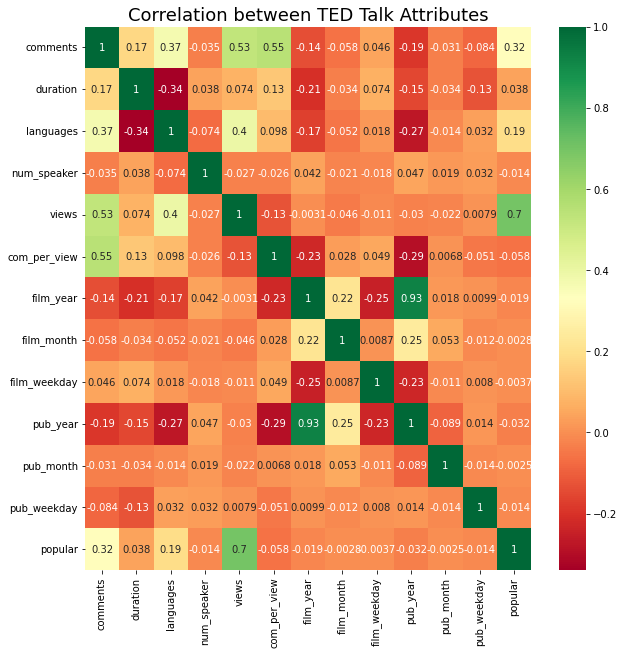

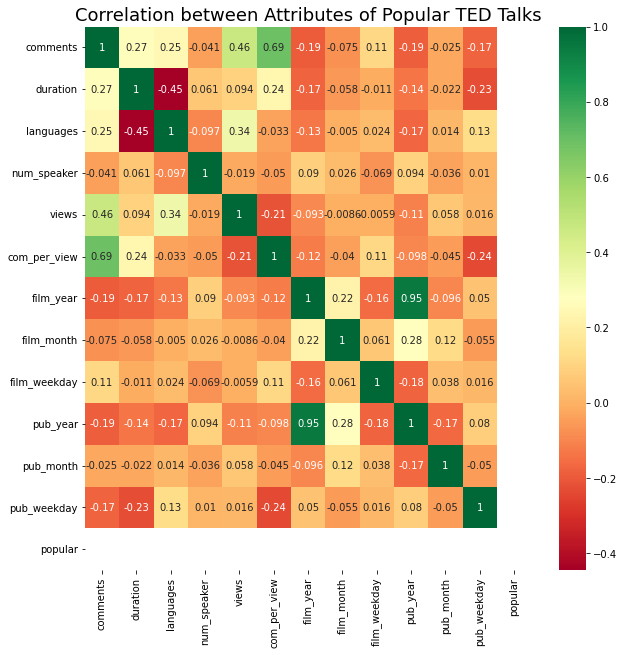

In [248]:
# 3. Find correlation between attributes using the heat map
plt.figure(figsize=(10,10))
plt.title("Correlation between TED Talk Attributes",fontsize=18)
sns.heatmap(df.corr(),cmap='RdYlGn', annot=True);

plt.figure(figsize=(10,10))
plt.title("Correlation between Attributes of Popular TED Talks",fontsize=18)
sns.heatmap(df_pop.corr(),cmap='RdYlGn', annot=True);

***
[BACK TO TABLE OF CONTENTS](#Table)
### Section 4: Final Thoughts on Defining Popularity using the Playlist  <a id='Thoughts'></a>
Overall, I don't think the definition using the most popular playlist defined by TED was successful. The popular events were older events where the talks have been published for a longer period of time. The definition was based on the lowest number of views and comments a TED talk had to be deemed by TED as a popular talk. The talk with the least views and comments was a talk given by Bill Gates called "The next outbreak? We're not ready" which in 2017 had 2.2 million views and 171 comments. In the present, the talk has 43 million views and has gone viral as of December 7th, 2021 [4]. TED didn't include the published date of the playlist so the talks included may have become popular after the data I have was collected.

Generally, the correlation between the attributes of popular talks was lower than the correlation between the attributes from every talk. The visualizations I created to show the popular talks didn't show a significant divergence from the distribution of all the data. For these reasons, defining popularity by views and comments based on the minimum from the playlist wasn't a good indicator of popularity. 

***
[BACK TO TABLE OF CONTENTS](#Table)
### Section 5: Define Popularity using Ratings and Views <a id='Rating'></a>
1. **Explore Ratings to Build Definition of Popularity:**
    - **Reasoning:** 
        - The Cambridge dictionary defines popular as "liked, enjoyed, or supported by many people" [5].
        - In my previous attempt, I was successful in calculating videos that have been seen and commented on by many people. However, I did not account for whether the talk was liked or enjoyed. 
        - I want to explore the ratings column as it may have insights on whether a talk was liked or enjoyed by viewers. 
        - Also, I will take into consideration the number of views because the Cambridge definition also included by many people. An idea I have is to calculate the median of the views column so outliers will not heavily impact the number of views needed to be considered popular. 
2. **Calculate Ratio between Popular and Unpopular ratings:**
    - There are 14 ratings in total.
    - *Popular Ratings*:
        - **Rating Names:** Funny', 'Beautiful','Ingenious', 'Courageous', 'Fascinating' ,'Persuasive', 'Jaw-dropping', 'Informative' and 'Inspiring'
        - **Reasoning:** Popular ratings are the words I would use if I liked or enjoyed a TED talk.
    - *Unpopular Ratings*:
        - **Rating Names:** 'Longwinded', 'Unconvincing', 'OK', 'Obnoxious', 'Confusing'
        - **Reasoning:** Unpopular ratings are the words I would if I wasn't enjoying a TED Talk
3. **Define Popularity:**
    - **Defintion:** *The popular ratio (column = ratio_pop) is greater than 10. The number of views on the talk is greater than 1 million views.*
    - **Results:** Using the definition, 774 rows or about 32.5% of the dataset is defined as popular which I believe is reasonable.
    - **Reasoning:** 
        - I decided the popular ratio must be more than 10 because the median of the ratio_pop column is around 10.105. 
        - I decided the number of views must be greater than 1 million views because the median of the views column is around 1.16 million views.

In [387]:
# 1. Explore Ratings to Build Definition of Popularity

# List of the possible ratings
rating_name = ['Funny','Beautiful','Ingenious','Courageous','Longwinded','Fascinating','Unconvincing','Persuasive',
              'Jaw-dropping','OK','Obnoxious','Informative','Confusing','Inspiring']

# Find the rating counts for each talk
def count_ratings(x):
    rating_count = []
    for rating in range(len(df['ratings'])):
        # PROCESS: Successfully implemented it on df['ratings'][0] first so I could debug easier
        small = df['ratings'][rating].split()
        count = 0 # if no rating, count is 0
        for i in range(len(small)):
            if (x in small[i]): # If the correct split, find count for that rating
                count_index = i + 2 # By how I split it, I know the index of the count string is 2 away
                count_string = small[count_index] 
                count = count_string.split("}")
                count = int(count[0]) # First index is the count, type cast to int
                break 
        rating_count.append(count)
    rating_pd = pd.Series(rating_count)
    df[x] = rating_pd # Add pandas series to original df

# Loop through possible ratings    
for rating in rating_name: 
    count_ratings(rating)

# Create a smaller dataframe for the name of TED Talk and ratings
df_ratings = df[['name','Funny','Beautiful','Ingenious','Courageous','Longwinded','Fascinating','Unconvincing','Persuasive',
              'Jaw-dropping','OK','Obnoxious','Informative','Confusing','Inspiring']]
df_ratings.head()



,name,Funny,Beautiful,Ingenious,Courageous,Longwinded,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Informative,Confusing,Inspiring
0,Ken Robinson: Do schools kill creativity?,19645,4573,6073,3253,387,10581,300,10704,4439,1174,209,7346,242,24924
1,Al Gore: Averting the climate crisis,544,58,56,139,113,132,258,268,116,203,131,443,62,413
2,David Pogue: Simplicity sells,964,60,183,45,78,166,104,230,54,146,142,395,27,230
3,Majora Carter: Greening the ghetto,59,291,105,760,53,132,36,460,230,85,35,380,32,1070
4,Hans Rosling: The best stats you've ever seen,1390,942,3202,318,110,4606,67,2542,3736,248,61,5433,72,2893


In [388]:
# 2. Calculate Ratio between Popular and Unpopular ratings

# List of ratings by popular or unpopular
popular_rating = ['Funny','Beautiful','Ingenious','Courageous','Fascinating','Persuasive','Jaw-dropping',
                  'Informative','Inspiring']
unpopular_rating = ['Longwinded','Unconvincing','OK','Obnoxious','Confusing']

# Function to add popular ratings
def popular_rating_check(x):
    total = 0
    for i in popular_rating:
        total += x[i]
    return total

# Function to add unpopular ratings
def unpopular_rating_check(x):
    total = 0
    for i in unpopular_rating:
        total += x[i]
    return total

# Apply function to all rows in dataset
df['rating_pop'] = df.apply(lambda y: popular_rating_check(y), axis=1)
df['rating_unpop'] = df.apply(lambda y: unpopular_rating_check(y), axis=1)

# Calculate ratio between the popular and unpopular counts
def ratio_popular(x):
    if (x['rating_unpop'] == 0):
        return x['rating_pop']
    return int(x['rating_pop'] / x['rating_unpop'])
    
df['ratio_pop'] = df.apply(lambda y: ratio_popular(y), axis=1)
print("Median of Popular Ratio column: " + str(df['ratio_pop'].median()))
print("Median of View column: " + str(df['views'].median()))

Median of Popular Ratio column: 10.0
Median of View column: 1160049.0


In [389]:
# 2. Define popularity by the talk having a popular ratio (column = ratio_pop) 
#.   greater than 10 and having views greater than 1 million.

# Change the popular column to reflect my chosen definition of popularity
def popular2_check(x):
    if ((x['ratio_pop'] > 10) & (x['views'] > 1000000)):
        return 1 # 1 - the talk is popular
    return 0 # 0 - the talk is not popular

df['popular2'] = df.apply(lambda y: popular2_check(y), axis=1)
df_pop2 = df.loc[df['popular2'] == 1]
# Slice of df_pop2 with 10 columns for correlation heatmap
df_pop_corr = df_pop2[['comments','duration','languages','num_speaker','views','film_year','pub_year', 
                       'rating_pop','rating_unpop','ratio_pop']]
df_pop_corr

,comments,duration,languages,num_speaker,views,film_year,pub_year,rating_pop,rating_unpop,ratio_pop
0,4553,1164,60,1,47227110,2006,2006,91538,2312,39
3,200,1116,35,1,1697550,2006,2006,3487,241,14
4,593,1190,48,1,12005869,2006,2006,25062,558,44
10,79,1414,27,1,1211416,2006,2006,1665,115,14
13,242,527,27,1,4531020,2006,2006,8000,317,25
...,...,...,...,...,...,...,...,...,...,...
2336,36,736,10,1,1319327,2017,2017,779,38,20
2340,50,973,9,1,1051530,2017,2017,1024,65,15
2345,24,962,10,1,1159426,2017,2017,631,46,13
2362,25,993,2,1,1070238,2017,2017,927,54,17


***
[BACK TO TABLE OF CONTENTS](#Table)
### Section 6: Evaluate Definition of Popularity Using Ratings through Visualizations <a id='Eval'></a>
**NOTE:** Process is similar to Section 3 and the findings/results from the visualizations is presented in Section 7.

1. **Count of TED Talks per Year:**

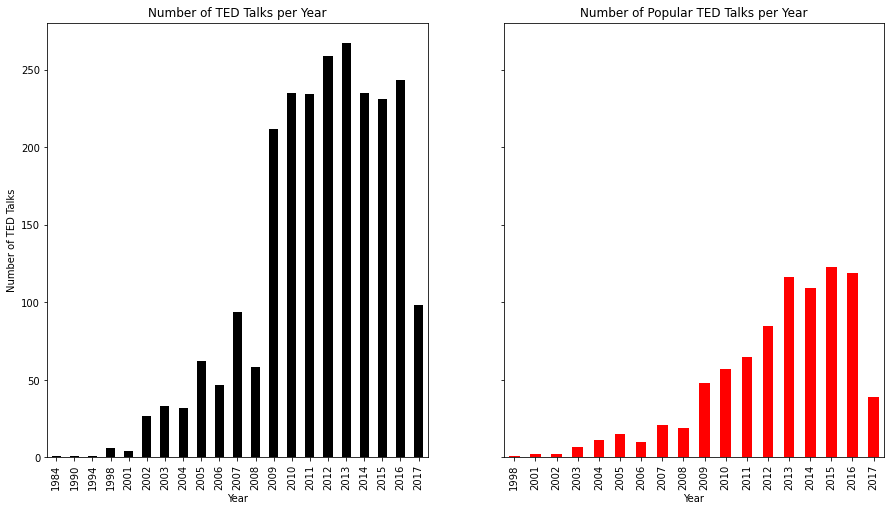

In [340]:
# 1. How many TED Talks were given at a TED event each year? How many were popular?

# Count of the number of TED Talks per year
year_pub = df['film_year'].value_counts().sort_index()
pop_pub = df_pop2['film_year'].value_counts().sort_index()

# Display visualization of subplots
fig, axis = plt.subplots(1, 2, sharey=True,figsize=(15,8))
ax1 = year_pub.plot(kind='bar',ax=axis[0],color='k')
ax1.set_title("Number of TED Talks per Year")
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of TED Talks')
ax2 = pop_pub.plot(kind='bar',ax=axis[1],color='r')
ax2.set_title("Number of Popular TED Talks per Year");
ax2.set_xlabel('Year');

2. **Views per TED Event:**

Number of TED events: 303
Number of events with popular TED talk: 87


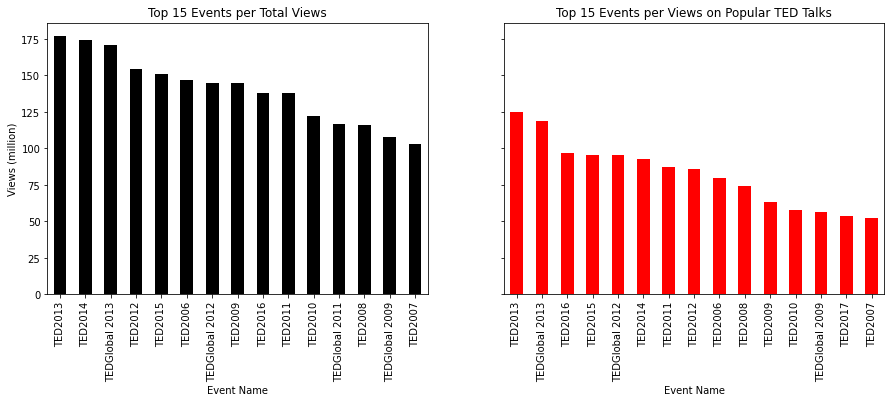

In [341]:
# 2. How many views per TED event?

# Sum views on TED Talks per year
views_year = df.groupby('event').sum()['views'].sort_values(ascending=False)[:15]
views_pop = df_pop2.groupby('event').sum()['views'].sort_values(ascending=False)[:15]

# Divide sum of views by a million so scale is easier to read
views_year = views_year.map(lambda x: x/1000000)
views_pop = views_pop.map(lambda x: x/1000000)

# Print number of unique events
print("Number of TED events: "+ str(df['event'].nunique()))
print("Number of events with popular TED talk: "+ str(df_pop['event'].nunique()))

# Display visualization of subplots
fig, axis = plt.subplots(1, 2, sharey=True,figsize=(15,5))
ax1 = views_year.plot(kind='bar',ax=axis[0],color='k')
ax1.set_title("Top 15 Events per Total Views")
ax1.set_xlabel('Event Name')
ax1.set_ylabel('Views (million)')
ax2 = views_pop.plot(kind='bar',ax=axis[1],color='r')
#plt.ylim(40000000,200000000)
ax2.set_title("Top 15 Events per Views on Popular TED Talks");
ax2.set_xlabel('Event Name');

3. **Correlation between Numerical Attributes**

*Result:*
- The new definition of popular talks caused for a much higher correlation between attributes, namely between comments, languages and views which were highly correlated with other attributes. An interesting finding was there was very little correlation between number of speakers and duration. 

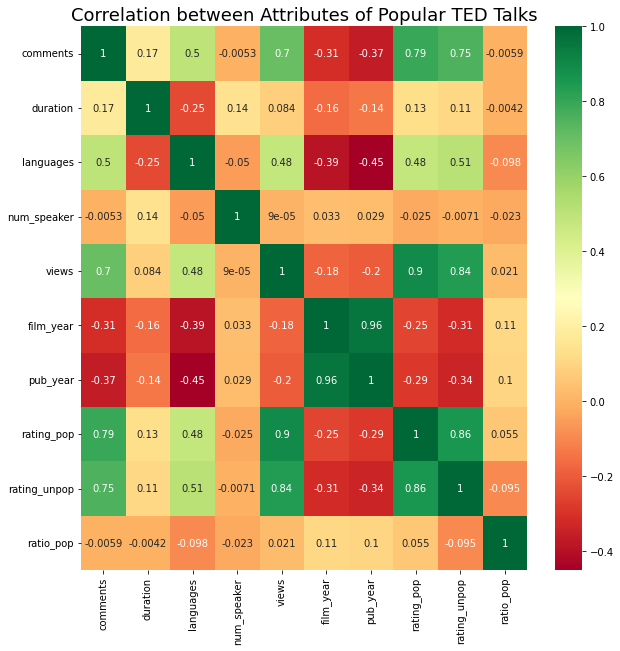

In [355]:
# 3. Find correlation between attributes using the heat map
plt.figure(figsize=(10,10))
plt.title("Correlation between Attributes of Popular TED Talks",fontsize=18)
sns.heatmap(df_pop_corr.corr(),cmap='RdYlGn', annot=True);

***
[BACK TO TABLE OF CONTENTS](#Table)
### Section 7: Final Thoughts on Defining Popularity with Views and Ratings <a id='Final'></a>
The definition of popularity with views and ratings was much more successful. in the first two visualizations, the popular data formed a different distribution than the baseline visualization of all the data. There is a strong correlation between many important attributes including rating_pop and views, views and comments and many other relationships. Overall, the correlations are stronger in the heatmap with this popular definition than the heatmap for all the TED talk data.

The popularity definition utilizing views and ratings is reasonable because it accounts for how much the talk is liked (i.e. ratings) and the number of viewers it reached.

***
[BACK TO TABLE OF CONTENTS](#Table)
### Section 8: Explore TED Talk Popularity <a id='Fav'></a>
1. **Fix issues with runtime of cells:**

In [362]:
# 1. Fix issues with runtime of cells

# Create a new dataset
df_sec8 = df.loc[df['popular2'] == 1]

# IF SECTION 8 IS SLOW, UNCOMMENT NEXT BLOCK OF CODE TO DROP UNNEEDED COLUMNS
df_sec8 = df_sec8.drop(['Funny','Beautiful','Ingenious','Courageous','Longwinded','Fascinating','Unconvincing',
                        'Persuasive','Jaw-dropping','OK','Obnoxious','Informative','Confusing','Inspiring'],axis=1)

df_sec8.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,film_month,film_weekday,pub_year,pub_month,pub_weekday,popular,rating_pop,rating_unpop,ratio_pop,popular2
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,2,5,2006,6,1,1,91538,2312,39,1
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,...,2,6,2006,6,1,0,3487,241,14,1
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,...,2,2,2006,6,1,1,25062,558,44,1
10,79,"Accepting his 2006 TED Prize, Cameron Sinclair...",1414,TED2006,2006-02-26,27,Cameron Sinclair,Cameron Sinclair: My wish: A call for open-sou...,1,2006-07-25 00:11:00,...,2,6,2006,7,1,0,1665,115,14,1
13,242,"Jeff Han shows off a cheap, scalable multi-tou...",527,TED2006,2006-02-06,27,Jeff Han,Jeff Han: The radical promise of the multi-tou...,1,2006-08-01 00:11:00,...,2,0,2006,8,1,1,8000,317,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,36,"On August 21, 2017, the moon's shadow raced fr...",736,TEDxMileHigh,2017-07-08,10,David Baron,David Baron: You owe it to yourself to experie...,1,2017-08-10 14:37:43,...,7,5,2017,8,3,0,779,38,20,1
2340,50,Do you sometimes have your most creative ideas...,973,TED2017,2017-04-24,9,Manoush Zomorodi,Manoush Zomorodi: How boredom can lead to your...,1,2017-08-15 15:00:23,...,4,0,2017,8,1,0,1024,65,15,1
2345,24,The Italian island of Sardinia has more than s...,962,TED2017,2017-04-24,10,Susan Pinker,Susan Pinker: The secret to living longer may ...,1,2017-08-18 14:59:45,...,4,0,2017,8,4,0,631,46,13,1
2362,25,What if you knew what your coworkers really th...,993,TED2017,2017-04-24,2,Ray Dalio,Ray Dalio: How to build a company where the be...,1,2017-09-06 14:48:37,...,4,0,2017,9,2,0,927,54,17,1


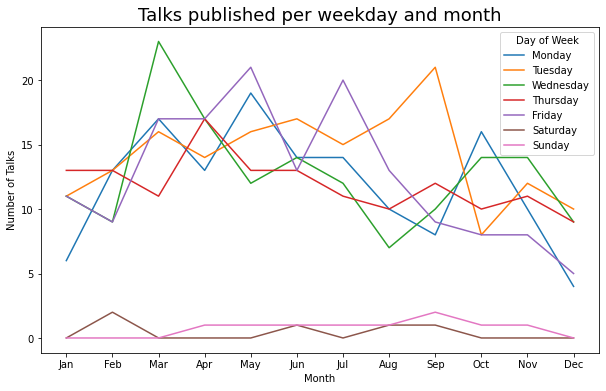

In [364]:
# 2. What is the most common month for publishing popular TED talks? What about day of the week?

order_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']

# Convert month and day to name so the visualization is easier to read for blog post
df_sec8['pub_month'] = df_sec8['pub_month'].apply(lambda x: calendar.month_abbr[x])
df_sec8['pub_weekday'] = df_sec8['pub_weekday'].apply(lambda x: calendar.day_name[x])

# Create a pivot table to summarize the number of talks per month (column) and day (row)
df_pivot = pd.pivot_table(df_sec8, index=['pub_month'], columns=['pub_weekday'], 
                          values='name', aggfunc ='count',
                          fill_value = 0).reindex(order_month, columns=order_week)

# Display visualization of TED Talk per year
plt.figure(figsize=(10,6))
plt.plot(df_pivot.index, df_pivot.values)
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'], title='Day of Week')
plt.title('Popular talks published per weekday and month', fontsize=18)
plt.xlabel('Month')
plt.ylabel('Number of Talks');

### Popular Talks Filmed per Day and Month Analysis

**Process**
- The process I chose was similar to one of the assignments. 
- A challenge I ran into was that the function to convert published_date into month and day columns created int values. I used calendar functions to convert the int values to the month and day abbreviations so the visualization would be easier to read.

**Results**
- The most popular talks are posted on a Wednesday in March. This finding makes sense as the main TED conference is held in late February or early March and spans for 5 days [3]. 
- Popular talks are hardly ever posted on the weekend compared to weekdays.

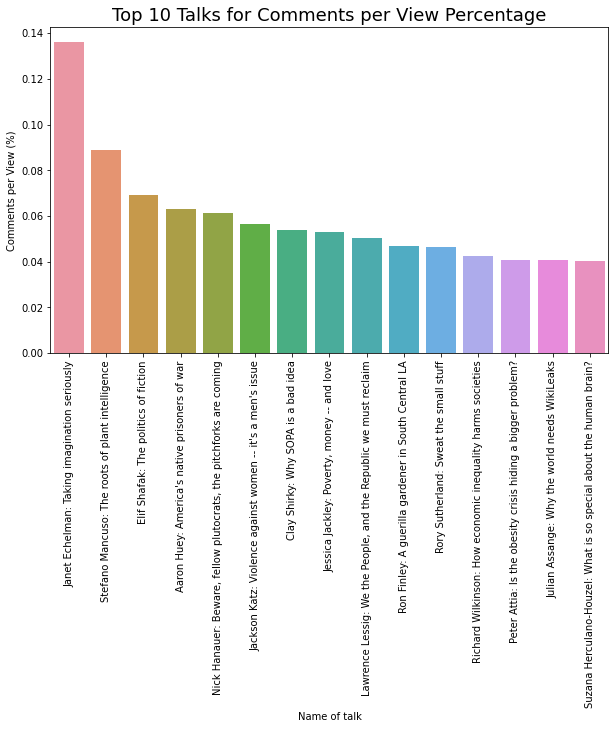

In [365]:
# 3. How many comments per view?

sorted_com = df_sec8.sort_values(by=['com_per_view'], ascending=False)
sliced_com = sorted_com[:15]
sliced_com.head(5) # Display the top 5 rows for comments per view check if the approach was successful

# Display visualization of TED Talk per year
plt.figure(figsize=(10,6))
sns.barplot(x=sliced_com['name'], y=sliced_com['com_per_view'])
plt.title('Top 10 Talks for Comments per View Percentage', fontsize=18)
plt.xticks(rotation=90)
plt.xlabel('Name of talk')
plt.ylabel('Comments per View (%)');

### Comments per View Ratio Analysis
**Process**
- To explore the correlation between views and comments on popular talks, I decided to calculate the ratio between views and comments. The ratio was used to minimize the chances that the large viewership on a talk caused the most comments instead of the talk prompting a lot discussion for the number of viewers on the video. 
- The x axis label was the row index so I changed from matplotlib to seaborn bar so I could easily specify the x axis data to title.

**Results**
- The strategy I used to find a ratio between comments and views was unsuccessful. The ratio of top 15 talks for comments per view is rather small ranging from around 0.04%-0.14%. I attempted to use a ratio to minimize the dependancy on viewership but it instead caused talks with tens of millions of views to have very low percentages. In short, I don't think the ratio was a good indicator for the engagement in the comments of a TED talk.  

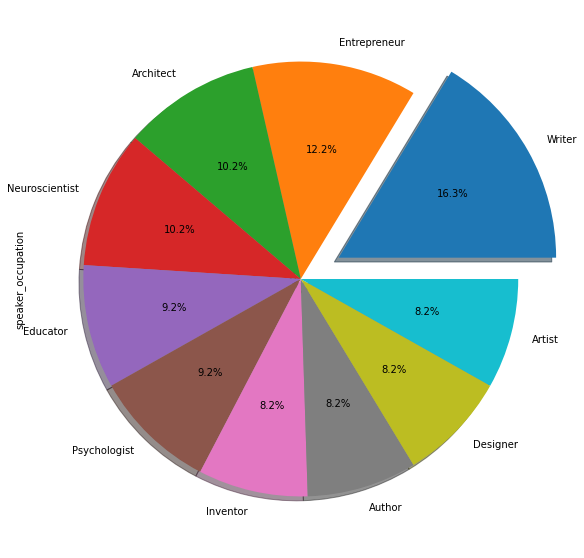

In [384]:
# 4. What occupations are common in speakers with popular TED talks?
occupation = df_sec8['speaker_occupation'].value_counts().sort_values(ascending=False)[:10]

explode = (0.2,0,0,0,0,0,0,0,0,0)
occupation.plot.pie(autopct='%1.1f%%', explode=explode, shadow=True, figsize=(10,10))
plt.show()

### Most Common Speaker Occupations With Popular Talk Analysis
**Process**
- I used the value_count from the speaker_occupation column and sliced the result to include the highest 10 counts.
- I plotted on a pie chart as I thought it would show the top 10 most popular occupations within the talks designated as popular is relatively evenly distributed. 

**Results**
- The most common occupation within popular TED talks is a writer.
- Other common occupations are educator, psychologist and entrepreneur.

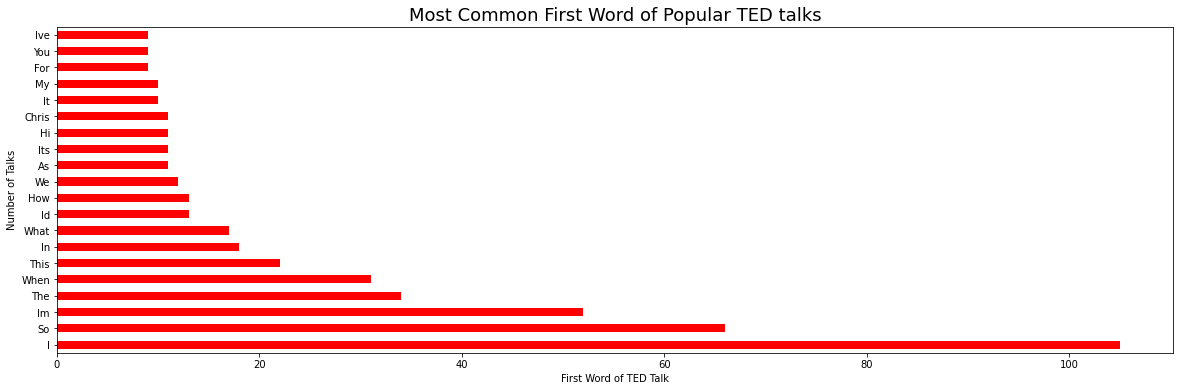

In [386]:
# 5. What is the common first word in the transcript of popular TED Talks?

# Remove punctuation from word (ex. Hi! and Hi would )
def remove_punc(text):
    removed = string.punctuation
    for s in removed:
        text = text.replace(s, '')
    return text

df_sec8['first_word'] = df_sec8['transcript'].apply(lambda x: x.split(" ")[0]).apply(remove_punc)
first_word = df_sec8['first_word'].value_counts()[:20]

# Display visualization
plt.figure(figsize=(20,6))
plt.title('Most Common First Word of Popular TED talks', fontsize=18)
plt.xlabel('First Word of TED Talk')
plt.ylabel('Number of Talks')
first_word.plot.barh(color='r');

***
[BACK TO TABLE OF CONTENTS](#Table)
## Potential in Data Science <a id='Potential'></a>
Based on my analysis, the 'TED Talks' dataset has considerable potential as a data science or machine learning project. The data is high-quality with few null values, over 2000 rows of accurate data and fascinating attributes that are both numerical and categorical. In addition, I found a definition of popularity using ratings and views that showed a moderate to strong correlation between data attributes. This exploration showed a potential pattern within the dataset that could be explored in a machine learning project.

Within data science, there is potential to analyze the data further using pandas and data visualizations (ex. seaborn and matplotlib). It would be interesting to delve deeper into the relationship between different attributes. For example, I could explore the relationship between positive ratings and other data attributes. Also, I would use the transcript column to find the most common opening and closing phrases. Another idea would be to find the most popular film_month and film_weekday based on value_counts.

There is tremendous potential to pursue a classification machine learning project. I generated a definition for TED talk popularity which took considerable time. My attempt showed the potential within the dataset to classify TED talks as popular or unpopular. In my analysis, the most relevant data attributes were ratings, views, comments and languages. If I pursued a machine learning project, I would select, train and evaluate multiple predictive models to classify popularity much more efficiently. I would use an unsupervised learning model to identify patterns as popularity is subject to interpretation, and I couldn't classify the talks as popular or unpopular beforehand.

***
[BACK TO TABLE OF CONTENTS](#Table)
## Conclusion <a id='Conclusion'></a>
In conclusion, I gathered valuable insights from the TED talk dataset through manipulating data, finding useful insights and visualizing the data on various graphs. 

Arguably, what is more valuable are the lessons I learned along the way. I learned the importance of data cleaning and pre-processing when I realized that the talks within the dataset were not solely TED events. In the first few visualizations, I learned to thoroughly define and understand the data attributes. If I didn't research when the first TED talk was, I wouldn't have noticed that the range of years TED talks occurred was inaccurate. I solved the logic bug by using the film date instead of the published date column for the visualization. Although granular data makes creating data visualizations easier, I learned to be pickier about adding new columns. By the end of my analysis, my dataset had gained 26 columns, and the code was much slower. In addition, I gained experience in manipulating data columns, and I applied it to more advanced data manipulation when I counted ratings within dictionaries. This part of the project was challenging to understand what was assigned to each variable. I learned to use print statements to visually output what happened after each for loop and split function. 

A limitation of the project is that the data is four years old, and the causes of TED talk popularity may have changed. A future direction could be to collect up-to-date data from TED.com. 

In the future, the model may help to classify TED talk popularity. These insights would assist future speakers in deciding how long to talk, how to open or close their talk. It could provide TED with insights on when to post TED talks, what speakers to invite back for another talk or what speaker occupations/topics lead to the most popular TED talks. Lastly, the perspective that started the curiosity in this dataset in the first place, the viewer. Based on the popularity classification, a list of popular talks, speakers, and topics would assist the viewer in finding TED talks that are both interesting and enjoyable. 

***
[BACK TO TABLE OF CONTENTS](#Table)
## References <a id='References'></a>
1. TED Staff. *History of TED*. TED. https://www.ted.com/about/our-organization/history-of-ted
2. TED Staff. *The most popular talks of all time*. TED. https://www.ted.com/playlists/171/the_most_popular_talks_of_all
3. TED Staff. *Past TEDs*. TED. https://www.ted.com/about/conferences/past-teds
4. Gates, B. (2015, March). *The next outbreak? We're not ready* [Video]. TED Conferences. https://www.ted.com/talks/bill_gates_the_next_outbreak_we_re_not_ready 
5. *Popular*. Cambridge Dictionary. https://dictionary.cambridge.org/dictionary/english/popular